In [21]:
import librosa
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [7]:
from glob import glob 
import librosa.display 
import IPython.display as ipd

In [10]:
features = pd.read_csv('Datasets/GTZan/features_30_sec.csv')

In [11]:
features.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [16]:
pop_music =glob('Datasets/GTZan/genres_original/pop/*.wav')

In [19]:
ipd.Audio(pop_music[60])

In [22]:
prp, sr =  librosa.load(pop_music[60])

In [26]:
prp_p = pd.Series(prp)

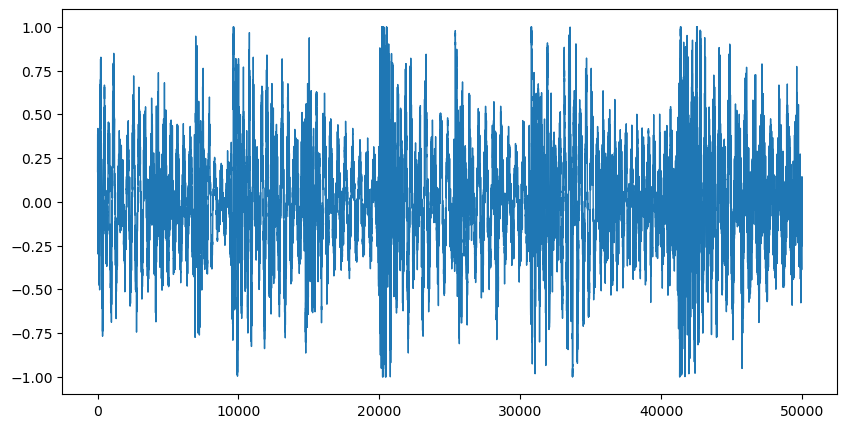

In [33]:
pd.Series(prp[400000:450000]).plot(figsize=(10,5), lw=1)
plt.show()

Spectogram

In [35]:
D = librosa.stft(prp)

In [42]:
D.shape

(1025, 1293)

In [43]:
S_pb = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [44]:
S_pb.shape

(1025, 1293)

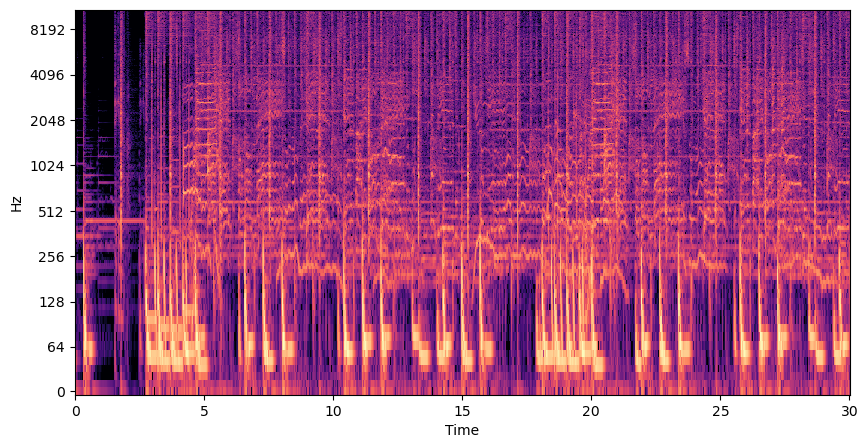

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_pb,x_axis='time', y_axis='log', ax=ax)

MELL Spectrogram

In [54]:
s = librosa.feature.melspectrogram(y=prp, sr=sr, n_mels=100)

s_db_mel = librosa.amplitude_to_db(s, ref=np.max)


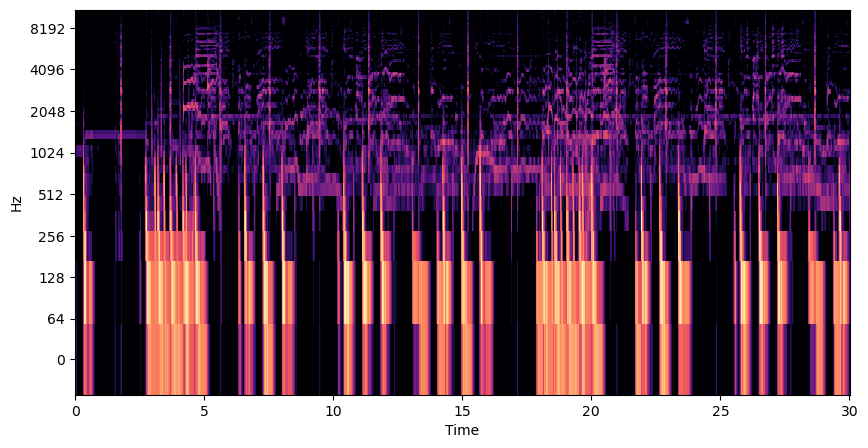

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db_mel,x_axis='time', y_axis='log', ax=ax)

librosa.feature_melspectrogram()